<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.499816  53.791514  33.265112  0.028583  194.585025   
      1.0    92.990026  63.795321  46.611888  0.016700  213.413935   
      2.0    99.245798  52.347864  29.679482 -0.000477  191.272667   
      3.0    57.940969  35.620557  91.507270  0.009019  195.077814   
      4.0    89.963726  31.094703  37.931034  0.065026  169.054488   
...                ...        ...        ...       ...         ...   
999.0 115.0  75.130517  47.107909  90.358996 -0.038873  222.558550   
      116.0  23.520487  91.159326  73.499362 -0.013011  198.166164   
      117.0  42.401747  91.658041  51.371596 -0.006766  195.424618   
      118.0  87.974136  43.314912  38.383668 -0.068717  179.603999   
      119.0  88.829222  92.681159  64.957821  0.005809  256.474011   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.561949  0.023077  
      1.0    213.400526  0.013410  
      2.0    191.279513 -0.006846  
      3.0    195.051418  0.026397  
      4.0    168.988622  0.065867  
...                 ...       ...  
999.0 115.0  222.597407 -0.038857  
      116.0  198.191998 -0.025835  
      117.0  195.433926 -0.009308  
      118.0  179.660601 -0.056602  
      119.0  256.455524  0.018487  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.499816  53.791514  33.265112  0.028583  194.585025   
      1.0    92.990026  63.795321  46.611888  0.016700  213.413935   
      2.0    99.245798  52.347864  29.679482 -0.000477  191.272667   
      3.0    57.940969  35.620557  91.507270  0.009019  195.077814   
      4.0    89.963726  31.094703  37.931034  0.065026  169.054488   
...                ...        ...        ...       ...         ...   
999.0 115.0  75.130517  47.107909  90.358996 -0.038873  222.558550   
      116.0  23.520487  91.159326  73.499362 -0.013011  198.166164   
      117.0  42.401747  91.658041  51.371596 -0.006766  195.424618   
      118.0  87.974136  43.314912  38.383668 -0.068717  179.603999   
      119.0  88.829222  92.681159  64.957821  0.005809  256.474011   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.561949  0.023077  
      1.0    213.400526  0.013410  
      2.0    191.279513 -0.006846  
      3.0    195.051418  0.026397  
      4.0    168.988622  0.065867  
...                 ...       ...  
999.0 115.0  222.597407 -0.038857  
      116.0  198.191998 -0.025835  
      117.0  195.433926 -0.009308  
      118.0  179.660601 -0.056602  
      119.0  256.455524  0.018487  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,97.499816,53.791514,33.265112,0.028583,194.585025,194.561949,0.023077
1,0.0,1.0,92.990026,63.795321,46.611888,0.016700,213.413935,213.400526,0.013410
2,0.0,2.0,99.245798,52.347864,29.679482,-0.000477,191.272667,191.279513,-0.006846
3,0.0,3.0,57.940969,35.620557,91.507270,0.009019,195.077814,195.051418,0.026397
4,0.0,4.0,89.963726,31.094703,37.931034,0.065026,169.054488,168.988622,0.065867
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,75.130517,47.107909,90.358996,-0.038873,222.558550,222.597407,-0.038857
119996,999.0,116.0,23.520487,91.159326,73.499362,-0.013011,198.166164,198.191998,-0.025835
119997,999.0,117.0,42.401747,91.658041,51.371596,-0.006766,195.424618,195.433926,-0.009308
119998,999.0,118.0,87.974136,43.314912,38.383668,-0.068717,179.603999,179.660601,-0.056602


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    97.499816  53.791514  33.265112  0.028583  194.585025   
      1.0    92.990026  63.795321  46.611888  0.016700  213.413935   
      2.0    99.245798  52.347864  29.679482 -0.000477  191.272667   
      3.0    57.940969  35.620557  91.507270  0.009019  195.077814   
      4.0    89.963726  31.094703  37.931034  0.065026  169.054488   
...                ...        ...        ...       ...         ...   
999.0 115.0  75.130517  47.107909  90.358996 -0.038873  222.558550   
      116.0  23.520487  91.159326  73.499362 -0.013011  198.166164   
      117.0  42.401747  91.658041  51.371596 -0.006766  195.424618   
      118.0  87.974136  43.314912  38.383668 -0.068717  179.603999   
      119.0  88.829222  92.681159  64.957821  0.005809  256.474011   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    194.561949  0.023077  
      1.0    213.400526  0.013410  
      2.0    191.279513 -0.006846  
      3.0    195.051418  0.026397  
      4.0    168.988622  0.065867  
...                 ...       ...  
999.0 115.0  222.597407 -0.038857  
      116.0  198.191998 -0.025835  
      117.0  195.433926 -0.009308  
      118.0  179.660601 -0.056602  
      119.0  256.455524  0.018487  

[120000 rows x 7 columns]

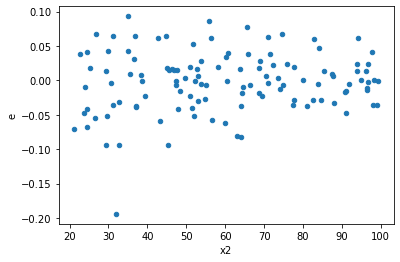

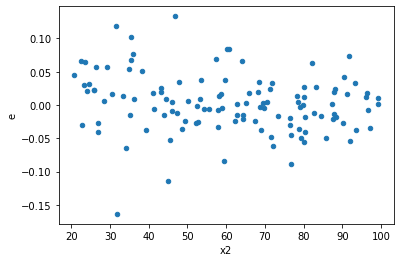

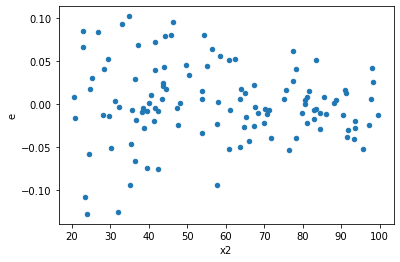

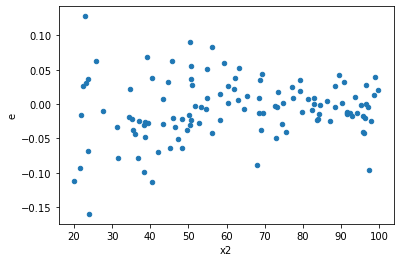

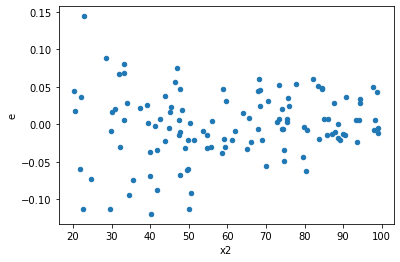

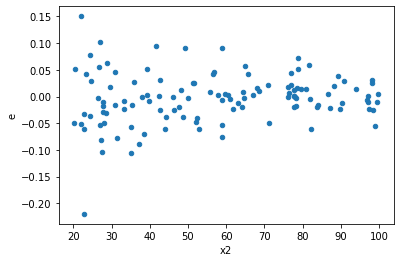

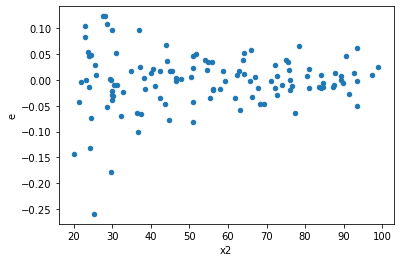

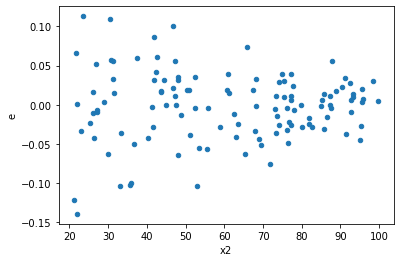

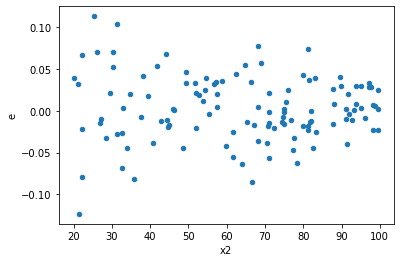

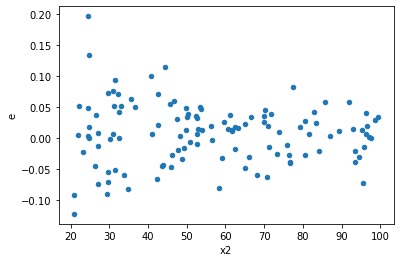

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
48.0,45.0,45.0,0.08985415894480185,0.14736516526954194,0.001996759087662263,0.0032747814504342655,1.6400483516858646,0.10060775154040535,0.9496961242297973,0.05030387577020268,Reject001=1 : Homoscedasticity
62.0,45.0,45.0,0.10904190816777329,0.1116127550906271,0.0024231535148394063,0.00248028344645838,1.0235766868541798,0.9380452621358666,0.5309773689320667,0.4690226310679333,Reject001=1 : Homoscedasticity
100.0,45.0,45.0,0.07988358136924187,0.07994296233215546,0.0017751906970942637,0.0017765102740478992,1.0007433437747255,0.9980224308975041,0.500988784551248,0.49901121544875204,Reject001=1 : Homoscedasticity
136.0,45.0,45.0,0.061860085666575686,0.06645652898569022,0.0013746685703683486,0.0014768117552375606,1.0743038628153418,0.8110737996709099,0.5944631001645451,0.40553689983545493,Reject001=1 : Homoscedasticity
175.0,45.0,45.0,0.09491782353791436,0.09667604295324808,0.002109284967509208,0.0021483565100721795,1.0185235959886016,0.9511838881396084,0.5244080559301958,0.4755919440698042,Reject001=1 : Homoscedasticity
232.0,45.0,45.0,0.05731743436482035,0.08442291672212276,0.0012737207636626744,0.0018760648160471725,1.472901180202492,0.1978683352575652,0.9010658323712174,0.0989341676287826,Reject001=1 : Homoscedasticity
237.0,45.0,45.0,0.06329374052703295,0.07051227981687389,0.0014065275672673987,0.0015669395514860862,1.1140482333597883,0.7187343899842649,0.6406328050078676,0.35936719499213243,Reject001=1 : Homoscedasticity
259.0,45.0,45.0,0.08416738347378927,0.09413306108365802,0.0018703862994175393,0.002091845801859067,1.1184030820320343,0.70903365430548,0.64548317284726,0.35451682715274,Reject001=1 : Homoscedasticity
277.0,45.0,45.0,0.08501396143026295,0.08613976121604011,0.0018891991428947321,0.0019142169159120025,1.0132425282487356,0.9649995254397006,0.5175002372801497,0.4824997627198503,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.10173017644082051,0.08717055183803549,0.0022606705875737893,0.0019371233741785664,0.8568799827919811,0.6065937593259272,Reject001=1 : Homoscedasticity
1.0,45.0,45.0,0.07347424494392224,0.05860086839609951,0.0016327609987538275,0.0013022415199133225,0.7975702021956872,0.45106002913515264,Reject001=1 : Homoscedasticity
2.0,45.0,45.0,0.13721055863399698,0.04729007590775372,0.003049123525199933,0.0010508905757278604,0.3446533297331576,0.0005118560542048716,Reject001=0 : Heteroscedasticity
3.0,45.0,45.0,0.12662258593396397,0.06076113022591676,0.0028138352429769773,0.001350247338353706,0.47986012746260626,0.015410442041315838,Reject001=1 : Homoscedasticity
4.0,45.0,45.0,0.1090994737759972,0.07156428357628698,0.0024244327505777157,0.0015903174128063774,0.6559544340536656,0.1611125216607836,Reject001=1 : Homoscedasticity
5.0,45.0,45.0,0.12445905525042701,0.08768386048027241,0.0027657567833428223,0.0019485302328949424,0.7045197338501538,0.2439052697968067,Reject001=1 : Homoscedasticity
6.0,45.0,45.0,0.1414013657018031,0.07311605963151091,0.0031422525711511796,0.001624801325144687,0.5170817075819698,0.029212819608556227,Reject001=1 : Homoscedasticity
7.0,45.0,45.0,0.13593563754705681,0.03222571207631488,0.0030207919454901516,0.0007161269350292196,0.23706595752095777,3.909146592737069e-06,Reject001=0 : Heteroscedasticity
8.0,45.0,45.0,0.09946193879171691,0.04809066934269518,0.0022102653064825983,0.0010686815409487818,0.4835082638334828,0.016479358138181043,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    540
Reject001=1 : Homoscedasticity      460
Name: Result_test, dtype: int64